In [ ]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


In [ ]:
digits_mnist = tf.keras.datasets.mnist.load_data(path="mnist.npz")


11490434/11490434 [==============================] - 1s 0us/step


In [ ]:

(x_train, y_train), (x_test, y_test) = digits_mnist


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train = x_train / 255.0

x_test = x_test / 255.0

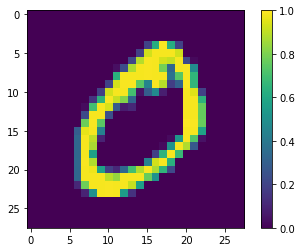

In [ ]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

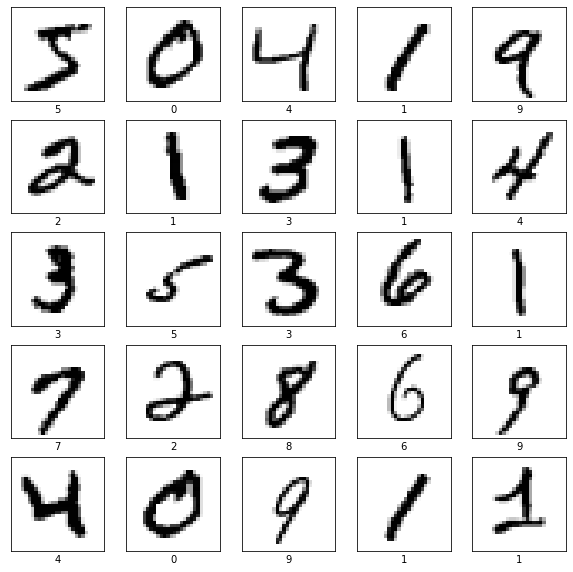

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 60 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('loss') < 0.0062):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [ ]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10,callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1426 - accuracy: 0.9556
Epoch 2/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0476 - accuracy: 0.9849
Epoch 3/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0330 - accuracy: 0.9897
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0248 - accuracy: 0.9921
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0180 - accuracy: 0.9939
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0145 - accuracy: 0.9952
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0119 - accuracy: 0.9960
Epoch 8/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0093 - accuracy: 0.9970
Epoch 9/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0080 - accuracy: 0.9973
Epoch 10/10
1875/1875 [==============================] - 54s 29m

In [ ]:
test_loss, test_acc = model.evaluate(x_train,  y_train, verbose=2)

print('\nTest accuracy:', test_acc)

1875/1875 - 15s - loss: 0.0032 - accuracy: 0.9988 - 15s/epoch - 8ms/step

Test accuracy: 0.9988333582878113


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 3s 9ms/step


In [ ]:
print(np.argmax(predictions[0]))
print(y_test[0])

7
7


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

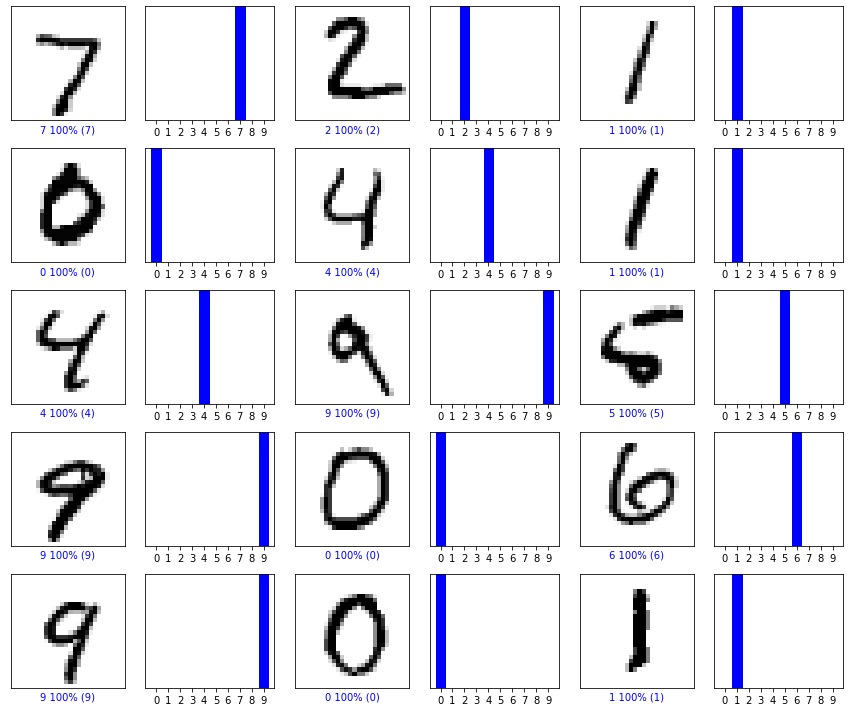

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i],y_test )
plt.tight_layout()
plt.show()

In [ ]:

import openai

openai.Completion.create(
  engine="davinci",
  prompt="Make a list of astronomical observatories:"
)

SyntaxError: ignored